In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data=pd.read_pickle('/users/caganze/research/isochrones.pkl')

In [3]:
data.keys()

dict_keys(['ca1', 'ca2'])

In [4]:
#ca1 = Fe/H= -1.5
#ca2= Fe/H= -0.5
mets={'ca1': -1.5, 'ca2': -0.5}

In [5]:
#

In [6]:
#list(data['ca1'].keys())

#data[mk][k]['photometry'][0.5]['VEGAMAG'].keys()


In [7]:
data['ca1'][1000.0].keys()

dict_keys(['mass', 'teff', 'radius', 'logg', 'lum', 'bol_mag', 'photometry', 'tau_100_temp', 'tau_100_pgas', 'photosphere_temp', 'photosphere_pgas'])

In [8]:
cols=['mass', 'teff', 'radius', 'logg', 'lum', 'bol_mag', 'photometry', 'tau_100_temp', 'tau_100_pgas', 'photosphere_temp']

In [9]:
dfs=[]

for mk in ['ca1', 'ca2']:
    for age in data['ca1'].keys():
        
        df={}
        for pk in  cols:
            if pk != 'photometry':
                df[pk]= data[mk][age][pk]
    
        for ex in data[mk][age]['photometry'].keys():
            print (ex)
            df['EBV']= np.ones_like(df[pk])*ex
            #print (data[mk][age][pk][ex]['VEGAMAG'].keys())
            for ky in data[mk][age]['photometry'][ex]['VEGAMAG'].keys():
                kynew=ky.split('.dat')[0]
                df[kynew]= (data[mk][age]['photometry'][ex]['VEGAMAG'][ky])
    

        df['Fe_H']= mets[mk]
        df['age']= age
        dfs.append(df)


0.0
0.017241379310344827
0.034482758620689655
0.05172413793103448
0.06896551724137931
0.08620689655172414
0.10344827586206896
0.12068965517241378
0.13793103448275862
0.15517241379310345
0.1724137931034483
0.1896551724137931
0.20689655172413793
0.22413793103448276
0.24137931034482757
0.25862068965517243
0.27586206896551724
0.29310344827586204
0.3103448275862069
0.3275862068965517
0.3448275862068966
0.3620689655172414
0.3793103448275862
0.39655172413793105
0.41379310344827586
0.43103448275862066
0.4482758620689655
0.46551724137931033
0.48275862068965514
0.5
0.0
0.017241379310344827
0.034482758620689655
0.05172413793103448
0.06896551724137931
0.08620689655172414
0.10344827586206896
0.12068965517241378
0.13793103448275862
0.15517241379310345
0.1724137931034483
0.1896551724137931
0.20689655172413793
0.22413793103448276
0.24137931034482757
0.25862068965517243
0.27586206896551724
0.29310344827586204
0.3103448275862069
0.3275862068965517
0.3448275862068966
0.3620689655172414
0.3793103448275862

In [10]:
df_t=pd.DataFrame.from_records(dfs)

In [11]:
df_small=df_t.iloc[0]
df_small

mass                 [0.05, 0.052502676005170716, 0.054454292348938...
teff                 [3284.7424436876813, 3295.67610989033, 3303.32...
radius               [-0.08918987357410375, -0.06708511564551647, -...
logg                 [3.3154173787873598, 3.2924192980889098, 3.275...
lum                  [-1.1576807798941702, -1.107698457666281, -1.0...
                                           ...                        
JWST_NIRISS.F277W    [5.165919906717163, 5.045428489693297, 4.95604...
LSST_LSST.z          [7.530853425424242, 7.4054766885366705, 7.3131...
PAN-STARRS_PS1.i     [8.32130193089682, 8.191941502636045, 8.096967...
Fe_H                                                              -1.5
age                                                             1000.0
Name: 0, Length: 107, dtype: object

In [12]:
def check_float(x):
    return np.isscalar(x)

In [13]:
check_float([2])

False

In [14]:
#rearrange now that we have all columns
cols= list(df_t.iloc[0].keys())
all_vals=[]
for idx in range(len(df_t)):
    df_small=df_t.iloc[idx]
    n= len(df_small.mass)
    dt_s={}
    for k in cols:
        if check_float(df_small[k]):
            vls= np.ones_like(df_small['mass'])*df_small[k]
            dt_s[k]= vls
        else:
            dt_s[k]= df_small[k]
        
    all_vals.append(pd.DataFrame(dt_s))
    
        
    

/var/folders/p5/jqfspzln0z965dsfd1pj_5900000gp/T/ipykernel_1173/1956528912.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(df_tot['LSST_LSST.g']-df_tot['LSST_LSST.r'],df_tot['LSST_LSST.i'],\


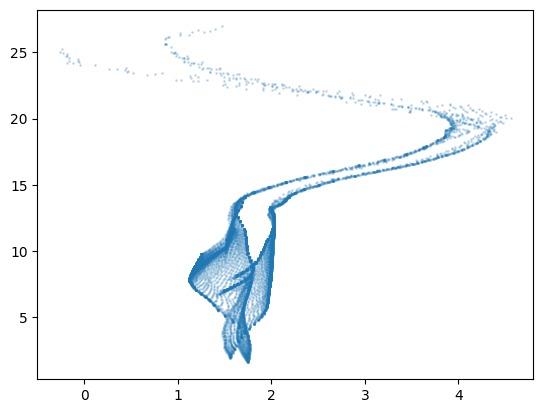

In [15]:
df_tot=pd.concat(all_vals)
fig, ax=plt.subplots()

ax.scatter(df_tot['LSST_LSST.g']-df_tot['LSST_LSST.r'],df_tot['LSST_LSST.i'],\
               s=1, alpha=0.2,  vmin=-2, vmax=1)

In [23]:
#df_t.EBV.values.flatten()

/var/folders/p5/jqfspzln0z965dsfd1pj_5900000gp/T/ipykernel_1173/1352350277.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(df_small['LSST_LSST.g']-df_small['LSST_LSST.r'], df_small['LSST_LSST.i'],\


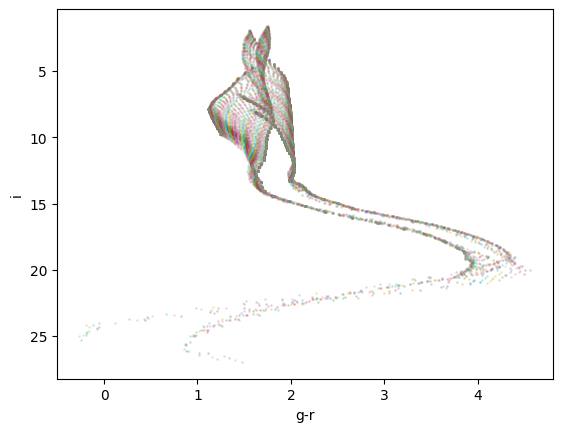

In [16]:
fig, ax=plt.subplots()

for idx in range(len(df_t)):
    df_small=df_t.iloc[idx]
    ax.scatter(df_small['LSST_LSST.g']-df_small['LSST_LSST.r'], df_small['LSST_LSST.i'],\
               s=1, alpha=0.2,  vmin=-2, vmax=1)

    ax.set(xlabel='g-r', ylabel='i')
ax.invert_yaxis()

In [17]:
df_tot.to_csv('/users/caganze/research/roman_new_isochrones.csv', index=False)